# 多项式回归

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5*x**2 + x + 2 + np.random.normal(0, 1, 100)

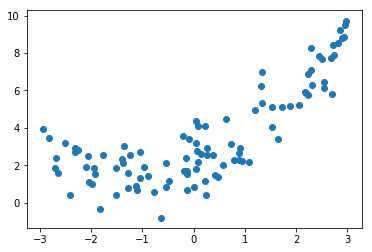

In [3]:
plt.scatter(X,y)
plt.show()

In [4]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_predict = lin_reg.predict(X)

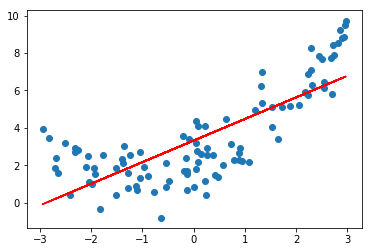

In [5]:
plt.scatter(x, y)
plt.plot(x, y_predict, color='r')
plt.show()

In [6]:
X2 = np.hstack([X, X**2])

In [7]:
X2.shape

(100, 2)

In [8]:
lin_reg2 = LinearRegression()
lin_reg2.fit(X2, y)
y_predict2 = lin_reg2.predict(X2)

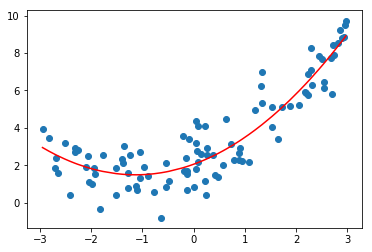

In [9]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color='r')
plt.show()

In [10]:
lin_reg2.coef_

array([0.99576772, 0.44101387])

In [11]:
lin_reg2.intercept_

2.0589462883196274

# sklearn

In [14]:
from sklearn.preprocessing import PolynomialFeatures

In [16]:
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)

In [17]:
X2.shape

(100, 3)

In [18]:
X[:5,:]

array([[ 0.78551061],
       [ 0.09584693],
       [ 0.00981839],
       [-1.10068593],
       [ 1.32516668]])

In [19]:
X2[:5,:]

array([[ 1.00000000e+00,  7.85510612e-01,  6.17026922e-01],
       [ 1.00000000e+00,  9.58469336e-02,  9.18663468e-03],
       [ 1.00000000e+00,  9.81839487e-03,  9.64008778e-05],
       [ 1.00000000e+00, -1.10068593e+00,  1.21150951e+00],
       [ 1.00000000e+00,  1.32516668e+00,  1.75606674e+00]])

In [20]:
from sklearn.linear_model import LinearRegression

In [22]:
lin_reg3 = LinearRegression()
lin_reg3.fit(X2, y)
y_predict3 = lin_reg3.predict(X2)

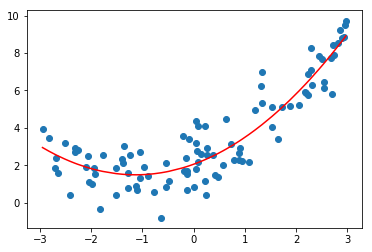

In [24]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict3[np.argsort(x)], color='r')
plt.show()

In [25]:
lin_reg3.coef_

array([0.        , 0.99576772, 0.44101387])

In [26]:
lin_reg3.intercept_

2.0589462883196274

In [28]:
X = np.arange(1, 11).reshape(-1, 2)
X

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [31]:
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)

In [32]:
X2.shape

(5, 6)

In [33]:
X2

array([[  1.,   1.,   2.,   1.,   2.,   4.],
       [  1.,   3.,   4.,   9.,  12.,  16.],
       [  1.,   5.,   6.,  25.,  30.,  36.],
       [  1.,   7.,   8.,  49.,  56.,  64.],
       [  1.,   9.,  10.,  81.,  90., 100.]])

# pipline

In [35]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5*x**2 + x + 2 + np.random.normal(0, 1, 100)

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [37]:
poly_reg = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("std_scaler", StandardScaler()),
    ("lin_reg", LinearRegression())
])

In [38]:
poly_reg.fit(X,y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lin_reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [40]:
y_predict = poly_reg.predict(X)

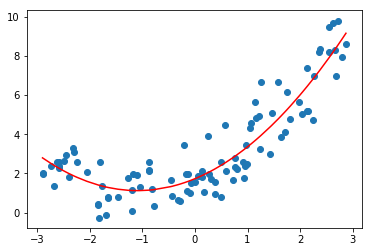

In [41]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
plt.show()